<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/IFR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ESTRATÉGIA
1.   IFR para 2 períodos < 5 compra na abertura seguinte
2.   Preço fechamento > ma5 vende na abertura seguinte



In [ ]:
#@markdown codigo é o ticker na B3. Data é ano/mes/dia.

inicio  = '2020-01-02'  #@param {type:"date"}
termino = '2022-11-30'  #@param {type:"date"}


usar_periodo = True #@param {type:"boolean"}
periodo = '2y' #@param ['1d','5d','1mo','3mo','6mo','1y','2y','3y','5y','10y','ytd','max']

In [ ]:
#@markdown Instala bibliotecas

import pandas as pd
import numpy as np

!pip install -q pyfolio
import pyfolio as pf

!pip install -q  yfinance
import yfinance as yf

import empyrical


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 KB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.3 MB/s eta 0:00:00


/usr/local/lib/python3.8/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 11.8 MB/s eta 0:00:00


In [ ]:
#@markdown ## tickers das ações para rastreio
## no caso, os papeis que compôem o indice IBrA

#IBrA
codigos = ['RRRP3', 'TTEN3', 'ABCB4', 'AERI3', 'AESB3', 'ALSO3', 'AALR3', 'ALPA4', 'ALUP11', 'ABEV3', 'AMBP3', 'AMER3', 'ANIM3', 
           'ARZZ3', 'ARML3', 'ASAI3', 'AURE3', 'AZUL4', 'B3SA3', 'BPAN4', 'BRSR6', 'BBSE3', 'BMOB3', 'BLAU3', 'BOAS3', 'BRML3', 
           'BRPR3', 'BBDC3', 'BBDC4', 'BRAP3', 'BRAP4', 'BBAS3', 'AGRO3', 'BRKM5', 'BRFS3', 'BPAC11', 'CXSE3', 'CAML3', 'CRFB3', 
           'CBAV3', 'CCRO3', 'CEAB3', 'CMIG3', 'CMIG4', 'CIEL3', 'CLSA3', 'COGN3', 'CSMG3', 'CPLE3', 'CPLE6', 'CSAN3', 'CPFE3', 
           'CMIN3', 'CURY3', 'CVCB3', 'CYRE3', 'DASA3', 'DESK3', 'DXCO3', 'PNVL3', 'DIRR3', 'DMMO3', 'ECOR3', 'ELET3', 'ELET6', 
           'EMBR3', 'ENAT3', 'ENBR3', 'ENGI11', 'ENEV3', 'EGIE3', 'ENJU3', 'EQTL3', 'ESPA3', 'EVEN3', 'EZTC3', 'FHER3', 'FESA4', 
           'FLRY3', 'GFSA3', 'GGBR4', 'GOAU4', 'GETT11', 'GOLL4', 'GGPS3', 'GRND3', 'GMAT3', 'NTCO3', 'SBFG3', 'SOMA3', 'GUAR3', 
           'HAPV3', 'HBOR3', 'HBSA3', 'HYPE3', 'IGTI11', 'PARD3', 'MEAL3', 'IFCM3', 'INTB3', 'MYPK3', 'RANI3', 'IRBR3', 'ITSA4', 
           'ITUB3', 'ITUB4', 'JALL3', 'JBSS3', 'JHSF3', 'KEPL3', 'KLBN11', 'LAVV3', 'LIGT3', 'RENT3', 'LWSA3', 'LOGG3', 'LOGN3', 
           'AMAR3', 'LREN3', 'MDIA3', 'MGLU3', 'POMO4', 'MRFG3', 'MATD3', 'CASH3', 'LEVE3', 'MILS3', 'BEEF3', 'MODL11', 'MOVI3', 
           'MRVE3', 'MLAS3', 'MULT3', 'NEOE3', 'NGRD3', 'OPCT3', 'ODPV3', 'MEGA3', 'ONCO3', 'ORVR3', 'PCAR3', 'PGMN3', 'PETR3', 
           'PETR4', 'RECV3', 'PRIO3', 'PETZ3', 'PSSA3', 'PTBL3', 'POSI3', 'QUAL3', 'LJQQ3', 'RADL3', 'RAIZ4', 'RAPT4', 'RCSL3', 
           'RDOR3', 'ROMI3', 'RAIL3', 'SBSP3', 'SAPR11', 'SANB11', 'STBP3', 'SMTO3', 'SEQL3', 'SEER3', 'CSNA3', 'SIMH3', 'SQIA3', 
           'SLCE3', 'SMFT3', 'SULA11', 'SUZB3', 'SYNE3', 'TAEE11', 'TASA4', 'TRAD3', 'TECN3', 'TGMA3', 'VIVT3', 'TEND3', 'TIMS3', 
           'TOTS3', 'TRPL4', 'TRIS3', 'TUPY3', 'UGPA3', 'UNIP6', 'USIM3', 'USIM5', 'VALE3', 'VLID3', 'VAMO3', 'VIIA3', 'VBBR3', 'VIVA3', 
           'VULC3', 'WEGE3', 'WIZS3', 'YDUQ3']

## outros indices
#IBrX100
#codigos = ['RRRP3', 'ALPA4', 'ABEV3', 'AMBP3', 'AMER3', 'ARZZ3', 'ASAI3', 'AURE3', 'AZUL4', 'B3SA3', 'BPAN4', 'BBSE3', 'BRML3', 'BBDC3', 'BBDC4', 'BRAP4', 'BBAS3', 'BRKM5', 'BRFS3', 'BPAC11', 'CRFB3', 'CBAV3', 'CCRO3', 'CMIG4', 'CIEL3', 'COGN3', 'CPLE6', 'CSAN3', 'CPFE3', 'CMIN3', 'CVCB3', 'CYRE3', 'DXCO3', 'ECOR3', 'ELET3', 'ELET6', 'EMBR3', 'ENAT3', 'ENBR3', 'ENGI11', 'ENEV3', 'EGIE3', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'NTCO3', 'SOMA3', 'HAPV3', 'HYPE3', 'IGTI11', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'RENT3', 'LWSA3', 'LREN3', 'MDIA3', 'MGLU3', 'MRFG3', 'CASH3', 'BEEF3', 'MOVI3', 'MRVE3', 'MULT3', 'PCAR3', 'PETR3', 'PETR4', 'PRIO3', 'PETZ3', 'PSSA3', 'QUAL3', 'RADL3', 'RAIZ4', 'RDOR3', 'RAIL3', 'SBSP3', 'SANB11', 'STBP3', 'SMTO3', 'CSNA3', 'SLCE3', 'SULA11', 'SUZB3', 'TAEE11', 'VIVT3', 'TIMS3', 'TOTS3', 'UGPA3', 'USIM5', 'VALE3', 'VAMO3', 'VIIA3', 'VBBR3', 'WEGE3', 'YDUQ3']
#Ibov
#codigos = ['RRRP3', 'ALPA4', 'ABEV3', 'AMER3', 'ARZZ3', 'ASAI3', 'AZUL4']#, 'B3SA3', 'BPAN4', 'BBSE3', 'BRML3', 'BBDC3', 'BBDC4', 'BRAP4', 'BBAS3', 'BRKM5', 'BRFS3', 'BPAC11', 'CRFB3', 'CCRO3', 'CMIG4', 'CIEL3', 'COGN3', 'CPLE6', 'CSAN3', 'CPFE3', 'CMIN3', 'CVCB3', 'CYRE3', 'DXCO3', 'ECOR3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'ENGI11', 'ENEV3', 'EGIE3', 'EQTL3', 'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'NTCO3', 'SOMA3', 'HAPV3', 'HYPE3', 'IGTI11', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 'RENT3', 'LWSA3', 'LREN3', 'MGLU3', 'MRFG3', 'CASH3', 'BEEF3', 'MRVE3', 'MULT3', 'PCAR3', 'PETR3', 'PETR4', 'PRIO3', 'PETZ3', 'POSI3', 'QUAL3', 'RADL3', 'RAIZ4', 'RDOR3', 'RAIL3', 'SBSP3', 'SANB11', 'SMTO3', 'CSNA3', 'SLCE3', 'SULA11', 'SUZB3', 'TAEE11', 'VIVT3', 'TIMS3', 'TOTS3', 'UGPA3', 'USIM5', 'VALE3', 'VIIA3', 'VBBR3', 'WEGE3', 'YDUQ3']

codigos = np.array(sorted(codigos),dtype=np.object_)


In [ ]:
#@markdown ## download dados do yahoo finance
## a ultima lina da tabela tem a data mais recente
df=pd.DataFrame()
if usar_periodo : df = yf.download(tickers=(codigos+'.SA').tolist(), period = periodo   , auto_adjust=True, progress = False )[['Open','Close']]
else: df = yf.download(tickers=(codigos+'.SA').tolist(), start = inicio , end = termino , auto_adjust=True, progress = False )[['Open','Close']]

d = dict(zip(df.columns.levels[1],df.columns.levels[1].str.rstrip('.SA') ))
df = df.rename(columns=d, level=1)

df.columns = [" ".join(col).strip() for col in df.columns.values]
df.head(1) #mostra a primeiro linha da tabela dos preços

,Open AALR3,Open ABCB4,Open ABEV3,Open AERI3,Open AESB3,Open AGRO3,Open ALPA4,Open ALSO3,Open ALUP11,Open AMAR3,...,Close VAMO3,Close VBBR3,Close VIIA3,Close VIVA3,Close VIVT3,Close VLID3,Close VULC3,Close WEGE3,Close WIZS3,Close YDUQ3
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-20 00:00:00-03:00,11.34,13.914399,14.920833,12.137764,NaN,20.368308,41.616575,26.143803,24.983771,6.18,...,NaN,18.756647,14.57,26.055101,37.999981,8.362978,7.313252,43.077927,6.721179,33.878578


In [ ]:
#@markdown  função que calcula o ifr a partir de uma serie de preços

def rsi(price, window=2):   
  '''
    calcula o ifr 
    "data" é uma lista de preços
    "window" é o periodo da janela móvel de obeservação, por default vale 2       
    Referencia: https://seekingalpha.com/article/4518407-rsi-indicator-meaning-and-calculation 
  '''
    
  data = pd.DataFrame(price).copy()
    
  data["Variation"] = data.diff()

  data["Gain"] = np.where(data["Variation"] > 0, data["Variation"], 0)
  data["Loss"] = np.where(data["Variation"] < 0, data["Variation"], 0)

  initial_avg_gain = data["Gain"].rolling(window).mean()
  initial_avg_loss = data["Loss"].abs().rolling(window).mean()

  avg_gain = initial_avg_gain
  avg_loss = initial_avg_loss
  for i in range(window, len(avg_gain)):
     avg_gain.iloc[i] = (avg_gain.iloc[i - 1] * (window - 1) + data["Gain"].iloc[i]) / window
     avg_loss.iloc[i] = (avg_loss.iloc[i - 1] * (window - 1) + data["Loss"].abs().iloc[i]) / window
  rsi = 100 - (100 / (1 + ( avg_gain / avg_loss )))
  return rsi

**lista os ativos do índice com ifr2 < 5**


In [ ]:
IFR = pd.DataFrame({f"{i}": rsi( df['Close '+i] , 2)  for i in codigos})

print('o ultimo preço é do dia',IFR.index[-1].day,'/',IFR.index[-1].month,'/',IFR.index[-1].year)
print('Os ativos com IFR<5 são:')
## seleciona os ativos dentre 'codigos' com ifr2 < 5 
lista_ifr=[]
for x in codigos :
  if IFR[x].iloc[-1]< 5 :  
    print(x)
    lista_ifr.append(x)

if len(lista_ifr)==0: print('Não tem papel')

o ultimo preço é do dia 19 / 1 / 2023
Os ativos com IFR<5 são:
AMER3
ENJU3
LJQQ3
PTBL3


**histórico da estratégia**

In [ ]:
# @ markdown Simula as operações
def trades (x):
  '''
  'trades' cria duas listas 'entrada' e 'saida' 
  essas listas têm 3 componentes: 
    a linha na tabela de dados do sinal de entrada/saida;
    a data seguinte do sinal (entrada/saida) e 
    o preço (open) de entrada/saida naquele dia
  '''
  open  = 'Open '+x
  close = 'Close '+x

  bt = df[[open , close]].copy() 
  #media movel simples de 5 periodos 
  bt['mm5'] = df[close].rolling(5).mean()  
  bt['ifr'] = IFR[x]
  bt=bt.dropna()

  ## marca todos os pontos com ifr2 < 5
  bt['sinal_entra'] = np.where(bt['ifr'] < 5 , 1 , 0)
  #marca todos pontos com close > mm5
  bt['sinal_sai'] = np.where(bt[close] > bt['mm5'] , -1 , 0)

  '''
  cria listas com os pontos de entrada e saída das operações
  1) percorre a tabela bt em ordem cronológica até achar sinal entrada
     quando acha, armazenas as informações: 
       linha da tabela, data do sinal e preço de abertura do dia seguinte
  2) em seguida, continua, a partir do proximo dia, até achar sinal saida
     quando acha, armazenas as informações: 
       linha da tabela, data do sinal e preço de fechamento do dia seguinte
  3) repete os passos 1 e 2 
  '''  
  entrada = []
  saida = []
  i=0
  while i < len(bt):
    while bt['sinal_entra'][i] == 0 : i+=1      #pega um sinal de entrada
    if i+1 < len(bt) :                          #se teve pregão dia seguinte,entra
        i+=1
        entrada.append( ( i-1, 
                         bt.index[i].date().strftime("%d/%m/%Y") , 
                         np.round(bt[open].iloc[i],2)))  
       #avança até o primeiro sinal de saída, que pode ser no proprio dia
        while (i < len(bt) and bt['sinal_sai'].iloc[i]==0) : i=i+1    
       #se teve pregão dia seguinte,sai  
        if i+1 < len(bt) :  
            i+=1
            saida.append( (i-1, 
                           bt.index[i].date().strftime("%d/%m/%Y")  , 
                           np.round(bt[open].iloc[i],2)) )  
            # senão, a ultima operação ainda não deu saida 
        else : entrada.pop()                    
    i=i+1
  return entrada,saida

In [ ]:
# @ markdown Mostra os resultados

resumo = pd.DataFrame(index=lista_ifr,columns=['IFR2', 'Operações' , 'Retornos positivos' , 'Tx acerto' , 'Acumulado', 'Retorno médio' , 'Duração média(dias)' ])

# usando as informações da função 'trades', simula as operações
# calcula o tempo de cada operação e a variação do preço do ativo

out =  [ [[],[]] for j in range(len(lista_ifr))] 
retornos = [ [[],[]] for j in range(len(lista_ifr))] 
z=0
for x in lista_ifr:
  dura = []  ## duração da operação, em dias uteis
  e    = []  ## pontos de entrada 
  s    = []  ## pontos de saida
  posret = 0 ## conta retornos positivos

  e,s = trades(x)
  # mensagens para ajudar na validação
  out1 =  ['' for j in range(len(e))] 
  out2 =  ['' for j in range(len(e))] 
  out3 =  ['' for j in range(len(e))] 
  for j in range(len(e)) :
      out1[j] =  "sinal de entrada em " + str(s[j][1]) + " e de saida em " + str(s[j][1]) 
      
      dias = s[j][0] - e[j][0]
      out2[j] = "durou "+str(dias)+" dias e "
      dura.append(dias)

      retorno = s[j][2]/e[j][2] - 1
      out3[j] = "variou "+str(round(retorno*100,3))+"%" 
      retornos[z][1].append(retorno)
      if retorno > 0 : posret +=1
  
  resumo.loc[x] = [ IFR[x][-1].round(2), len(e) , posret , np.round(posret/len(e),3) , #
                   np.round((np.array(retornos[z][1])+1).cumprod()[-1] - 1,2) , #
                   np.round(np.mean(retornos[z][1])*100,2) , np.round(np.mean(dura),1) ]
  
  retornos[z][0] = x
  out[z][0] = x
  for j in range(len(e)) : 
        out[z][1].append(out1[j] + out2[j]+out3[j])        
  z=z+1

resumo.sort_values(by=['Tx acerto'], ascending=False)

,IFR2,Operações,Retornos positivos,Tx acerto,Acumulado,Retorno médio,Duração média(dias)
AMER3,3.04,19,10,0.526,-0.65,-4.66,6.2
PTBL3,2.96,15,7,0.467,-0.42,-3.25,5.5
LJQQ3,1.65,22,9,0.409,-0.35,-1.76,4.6
ENJU3,2.21,22,8,0.364,-0.79,-5.82,6.5


In [ ]:
for x in range(len(lista_ifr)):
  print("\n******",retornos[x][0],"********")
  print('resumo dos retornos das operações:')
  print(pd.Series(retornos[x][1]).describe()  );


****** AMER3 ********
resumo dos retornos das operações:
count    19.000000
mean     -0.046576
std       0.110421
min      -0.315764
25%      -0.134714
50%       0.002020
75%       0.038449
max       0.083014
dtype: float64

****** ENJU3 ********
resumo dos retornos das operações:
count    22.000000
mean     -0.058229
std       0.126982
min      -0.492611
25%      -0.123283
50%      -0.026111
75%       0.009054
max       0.087873
dtype: float64

****** LJQQ3 ********
resumo dos retornos das operações:
count    22.000000
mean     -0.017616
std       0.064743
min      -0.154098
25%      -0.048578
50%      -0.007906
75%       0.033250
max       0.080695
dtype: float64

****** PTBL3 ********
resumo dos retornos das operações:
count    15.000000
mean     -0.032463
std       0.079804
min      -0.197686
25%      -0.050183
50%      -0.010204
75%       0.024921
max       0.036561
dtype: float64


In [ ]:
out

[['AMER3',
  ['sinal de entrada em 12/03/2021 e de saida em 12/03/2021durou 7 dias e variou -14.818%',
   'sinal de entrada em 30/04/2021 e de saida em 30/04/2021durou 3 dias e variou 5.292%',
   'sinal de entrada em 14/05/2021 e de saida em 14/05/2021durou 4 dias e variou -2.489%',
   'sinal de entrada em 25/05/2021 e de saida em 25/05/2021durou 3 dias e variou 3.486%',
   'sinal de entrada em 25/06/2021 e de saida em 25/06/2021durou 1 dias e variou 2.55%',
   'sinal de entrada em 13/08/2021 e de saida em 13/08/2021durou 14 dias e variou -15.209%',
   'sinal de entrada em 23/08/2021 e de saida em 23/08/2021durou 2 dias e variou 5.498%',
   'sinal de entrada em 04/10/2021 e de saida em 04/10/2021durou 9 dias e variou -12.125%',
   'sinal de entrada em 13/01/2022 e de saida em 13/01/2022durou 5 dias e variou 1.737%',
   'sinal de entrada em 02/03/2022 e de saida em 02/03/2022durou 3 dias e variou 1.161%',
   'sinal de entrada em 18/03/2022 e de saida em 18/03/2022durou 3 dias e variou 4

daqui pra baixo são testes de códigos

In [ ]:
#!pip install -q bt
#import bt

In [ ]:
#teste = bt.get('PETR3.SA',start='2022-01-01',end='2022-11-11')

In [ ]:
## para atualizar as carteiras dos indices
## tem quebaixar a csv manualmente, todo: webscraping da B3

##[Ibov](https://sistemaswebb3-listados.b3.com.br/indexPage/day/IBOV?language=pt-br), 
##[Ibrx100](https://sistemaswebb3-listados.b3.com.br/indexPage/day/IBXX?language=pt-br)
##[IbrA](https:https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-brasil-amplo-ibra-composicao-da-carteira.htm)
######################################
##    para importar os tickers da 
##    planilha da B3, baixar do link 
##    acima e upload no diretorio local 
##    do colab
######################################
#file  = "IBXXDia_12-09-22.csv"
##file = "IBOVDia_12-09-22.csv"
#file = "IBRADia_12-09-22.csv"
#tck = pd.read_csv(f"/content/{file}" , sep=';', encoding='ISO-8859-1',skipfooter=2, engine='python', thousands='.', decimal=',', header=1, index_col=False)
##print(tck['Código'])
#codigos =[]
#for i in range(len(tck)):
#  codigos.append(tck['Código'][i])

In [ ]:
##biblioteca *pronta* para o ifr
#!pip install -q  pandas_ta
#import pandas_ta as pta
## cria uma tabela com o ifr2 
#IFR2 = pd.DataFrame({f"{i}": pta.rsi( df['Adj Close '+i+'.SA'] , 2)  for i in codigos})
#IFR2 = IFR2[1:]
#IFR2.tail(1)

In [ ]:
x='AMER3'
open  = 'Open '+x
close = 'Close '+x

bt = df[[open , close]].copy() 
bt['retrn'] =  np.log(df[close]/df[close].shift(1)) 
bt['mm5'] = df[close].rolling(5).mean()  #media movel simples de 5 periodos 
bt['ifr'] = IFR[x]
bt=bt.dropna()


In [ ]:
bt

,Open AMER3,Close AMER3,retrn,mm5,ifr
Date,,,,,
2021-01-27 00:00:00-03:00,84.149776,83.100845,-0.012660,85.722192,8.900131
2021-01-28 00:00:00-03:00,83.257696,84.502686,0.016728,85.467311,51.779450
2021-01-29 00:00:00-03:00,84.816387,80.699089,-0.046056,84.002728,14.568497
2021-02-01 00:00:00-03:00,82.796945,81.914665,0.014951,82.875372,41.458674
2021-02-02 00:00:00-03:00,83.228285,87.541649,0.066437,83.551787,85.043339
...,...,...,...,...,...
2023-01-13 00:00:00-03:00,2.750000,3.150000,0.146771,8.172000,12.073352
2023-01-16 00:00:00-03:00,2.400000,1.940000,-0.484714,6.344000,8.279313
2023-01-17 00:00:00-03:00,1.970000,1.900000,-0.020834,4.342000,8.110796


In [ ]:
## marca todos os pontos com ifr2 < 5
bt['sinal_entra'] = np.where(bt['ifr'] < 5 , 1 , 0)
  #marca todos pontos com close > mm5
bt['sinal_sai']   = np.where(bt[close] > bt['mm5'] , -1 , 0)

In [ ]:
entrada = []
saida = []
i = 0
while i < len(bt):
  while (i < len(bt)) and (bt['sinal_entra'][i] == 0) : i+=1      #pega um sinal de entrada
  if i+1 < len(bt) : 
      entrada.append( ( i, bt.index[i].date().strftime("%d/%m/%Y") , np.round(bt[open].iloc[i+1],2)))  #guarda a linha e preço da próxima abertura
      i+=1
      while (i < len(bt) and bt['sinal_sai'].iloc[i]==0) : i=i+1    #avança até o primeiro sinal de saída
      if i+1 < len(bt) : saida.append( (i, bt.index[i].date().strftime("%d/%m/%Y")  , np.round(bt[open].iloc[i+1],2)) )   #se saiu da operação
      else : entrada.pop()                                     # a ultima operação ainda não deu saida
  i=i+1



bt['sinal']  =   bt[["sinal_entra", "sinal_sai"]].sum(axis=1)



In [ ]:
# creating long and short positions 
bt['position'] = bt['sinal'].replace(to_replace=0, method='ffill')
#
## shifting by 1, to account of close price return calculations
#bt['position'] = bt['position'].shift(1)#
#
## calculating stretegy returns
bt['strategy_returns'] = bt['retrn'] * (bt['position'])


In [ ]:
bt[['sinal_entra','sinal_sai','sinal' ]].dropna()

,sinal_entra,sinal_sai,sinal
Date,,,
2021-01-27 00:00:00-03:00,0,0,0
2021-01-28 00:00:00-03:00,0,0,0
2021-01-29 00:00:00-03:00,0,0,0
2021-02-01 00:00:00-03:00,0,0,0
2021-02-02 00:00:00-03:00,0,-1,-1
...,...,...,...
2023-01-13 00:00:00-03:00,0,0,0
2023-01-16 00:00:00-03:00,0,0,0
2023-01-17 00:00:00-03:00,0,0,0


Buy and hold returns: -4.432714715897074
Strategy returns: -5.873823063506393


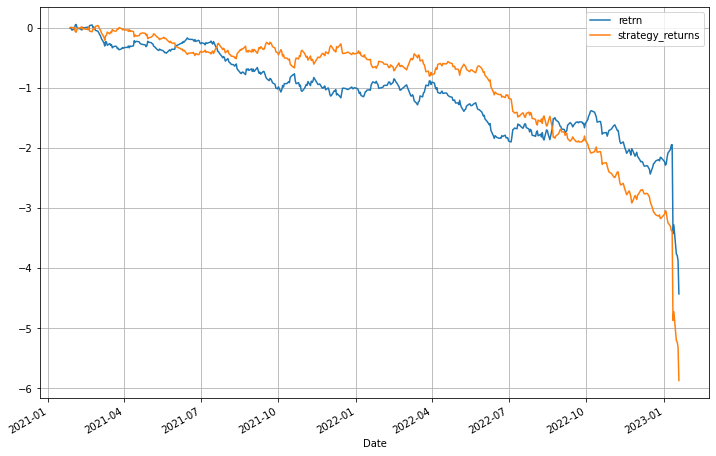

In [ ]:
# comparing buy & hold strategy / bollinger bands strategy returns
print("Buy and hold returns:",bt['retrn'].cumsum()[-1])
print("Strategy returns:",bt['strategy_returns'].cumsum()[-1])

# plotting strategy historical performance over time
df[['retrn','strategy_returns']] = bt[['retrn','strategy_returns']].cumsum()
df[['retrn','strategy_returns']].plot(grid=True, figsize=(12, 8))


/usr/local/lib/python3.8/dist-packages/empyrical/stats.py:447: RuntimeWarning: invalid value encountered in double_scalars
  return ending_value ** (1 / num_years) - 1
/usr/local/lib/python3.8/dist-packages/empyrical/stats.py:1494: RuntimeWarning: invalid value encountered in log1p
  cum_log_returns = np.log1p(returns).cumsum()


Start date,2021-01-27
End date,2023-01-19
Total months,23
,Backtest
Annual return,nan%
Cumulative returns,-113.7%
Annual volatility,195.1%
Sharpe ratio,-0.14
Calmar ratio,NaN
Stability,NaN
Max drawdown,-148.6%


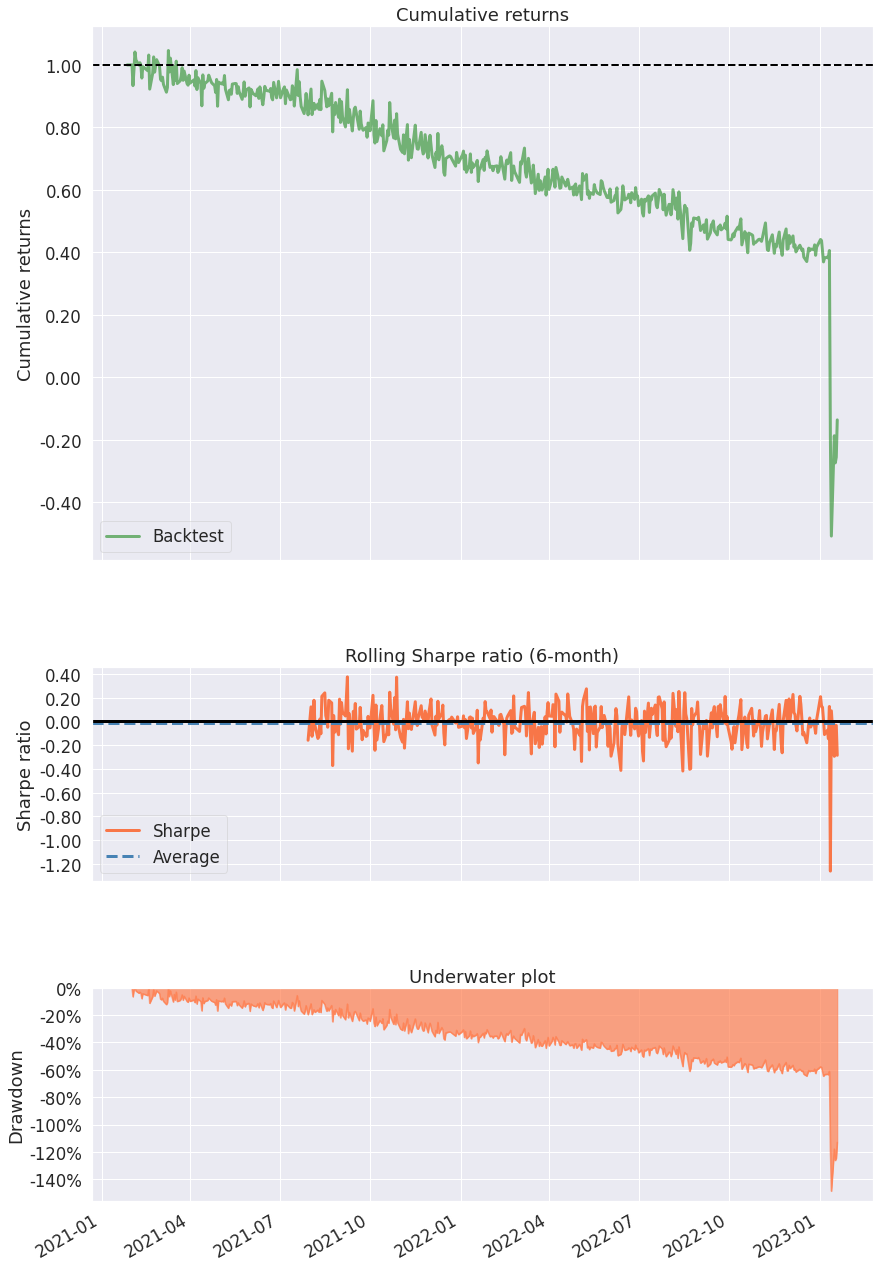

In [ ]:
pf.create_simple_tear_sheet(bt['strategy_returns'].diff())